<a href="https://colab.research.google.com/github/samaronov/Student-Performance-Analysis/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Bootcamp/csv/student_performance.csv")
df.head()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
most_study_hrs

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
779223,779224,40.0,76.1,6.4,100.0,A
891941,891942,40.0,72.6,8.8,100.0,A
334965,334966,40.0,92.3,5.4,100.0,A
912897,912898,40.0,100.0,9.1,100.0,A
628230,628231,40.0,93.4,5.2,100.0,A


In [33]:
grouped = df.groupby("grade")["weekly_self_study_hours"].mean()

grouped

,weekly_self_study_hours
grade,
A,19.375738
B,12.115533
C,7.691161
D,3.764143
F,1.524662


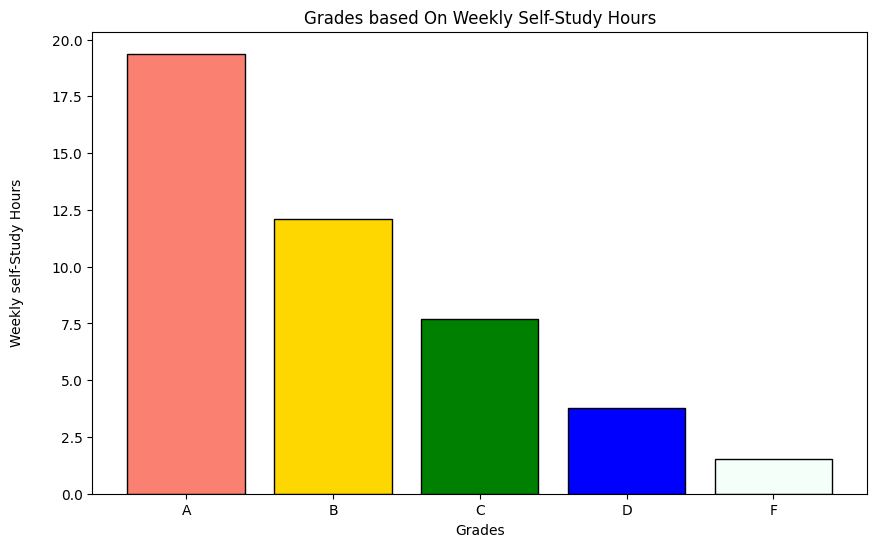

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color = ["salmon", "gold", "green", "blue", "mintcream", "deeppink"], edgecolor = "black")
plt.title("Grades based On Weekly Self-Study Hours")
plt.xlabel("Grades")
plt.ylabel("Weekly self-Study Hours", labelpad = 20)
plt.show()

In [57]:
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [58]:
df["weekly_self_study_hours"].min()

0.0

In [60]:
df["study_groups"] = np.where(
    df["weekly_self_study_hours"] >= 35, "35-40",
    np.where(df["weekly_self_study_hours"] >= 30, "30-35",
    np.where(df["weekly_self_study_hours"] >= 25, "25-30",
    np.where(df["weekly_self_study_hours"] >= 20, "20-25",
    np.where(df["weekly_self_study_hours"] >= 15, "15-20",
    np.where(df["weekly_self_study_hours"] >= 10, "10-15",
    np.where(df["weekly_self_study_hours"] >= 5, "5-10",
    "Below 5")))))))


df.head()



,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,study_groups
0,1,18.5,95.6,3.8,97.9,A,15-20
1,2,14.0,80.0,2.5,83.9,B,10-15
2,3,19.5,86.3,5.3,100.0,A,15-20
3,4,25.7,70.2,7.0,100.0,A,25-30
4,5,13.4,81.9,6.9,92.0,A,10-15


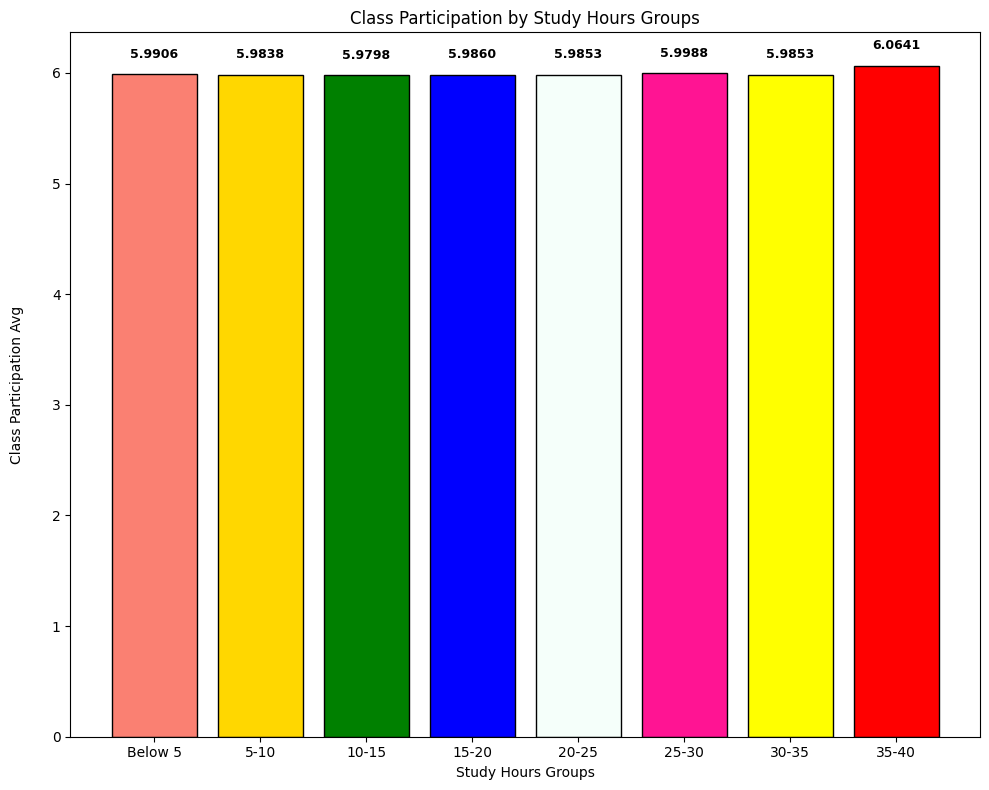

In [68]:
grouped = df.groupby("study_groups")["class_participation"].mean()

order = ["Below 5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40"]
grouped = grouped.reindex(order)

plt.figure(figsize=(10, 8))
bars = plt.bar(
    grouped.index, grouped.values,
    color=["salmon", "gold", "green", "blue", "mintcream", "deeppink", "yellow", "red"],
    edgecolor="black"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # x position (center of bar)
        height + (0.02 * max(grouped.values)),  # y position (slightly above bar, scaled)
        f"{height:.4f}",                   # 4 decimal places
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

plt.title("Class Participation by Study Hours Groups")
plt.xlabel("Study Hours Groups")
plt.ylabel("Class Participation Avg", labelpad=20)
plt.tight_layout()
plt.show()


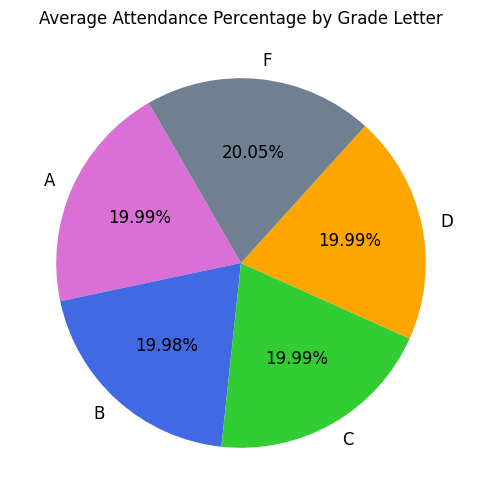

In [ ]:
grades = df.groupby("grade")["attendance_percentage"].mean()

color = ["orchid", "royalblue", "limegreen", "orange", "slategray"]
plt.figure(figsize=(8,6))
plt.pie(
    grades,
    labels=grades.index,
    colors=color[:len(grades)],  # match number of grades
    autopct=lambda p: f'{p:.2f}%',
    startangle=120,
    textprops={"fontsize": 12}
)

plt.title("Average Attendance Percentage by Grade Letter")
plt.show()

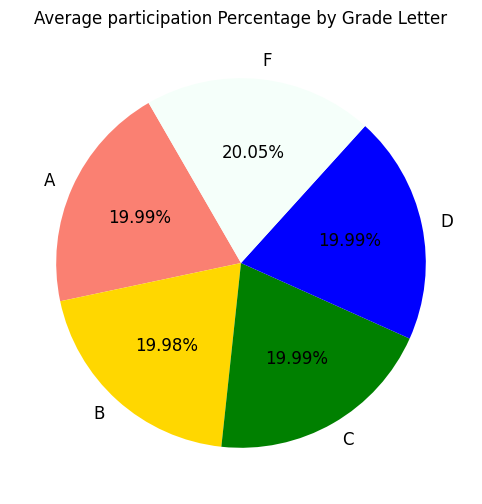

In [ ]:
participation = df.groupby("grade")["class_participation"].mean()

color = ["salmon", "gold", "green", "blue", "mintcream", "deeppink"]
plt.figure(figsize=(8,6))
plt.pie(
    grades,
    labels=grades.index,
    colors=color[:len(grades)],  # match number of grades
    autopct=lambda p: f'{p:.2f}%',
    startangle=120,
    textprops={"fontsize": 12}
)

plt.title("Average participation Percentage by Grade Letter")
plt.show()

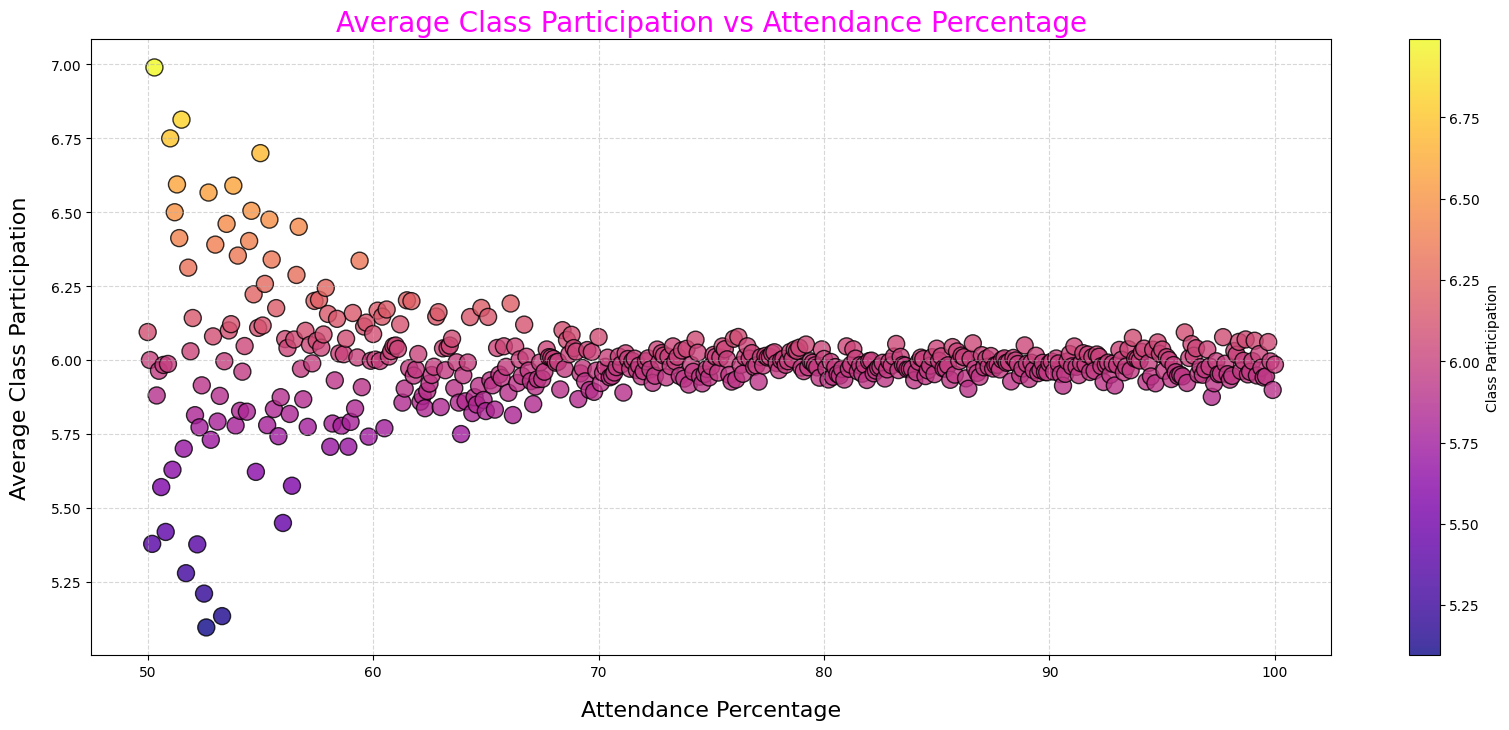

In [18]:
involvement = df.groupby("attendance_percentage")["class_participation"].mean().reset_index()

plt.figure(figsize=(20,8))
plt.scatter(
    x = involvement["attendance_percentage"],
    y = involvement["class_participation"],
    c = involvement["class_participation"],
    cmap = "plasma",
    alpha = 0.8,
    edgecolor = "black",
    s = 150
)

plt.title("Average Class Participation vs Attendance Percentage",
          c="magenta", fontsize=20)
plt.xlabel("Attendance Percentage", labelpad=15, fontsize=16)
plt.ylabel("Average Class Participation", labelpad=15, fontsize=16)
plt.colorbar(label="Class Participation")  # color legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

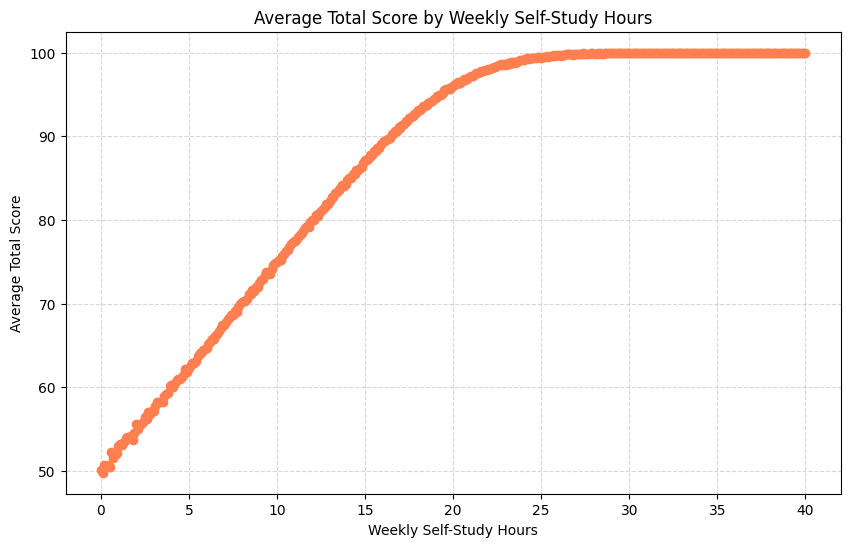

In [ ]:
self_study_result = df.groupby("weekly_self_study_hours")["total_score"].mean()

plt.figure(figsize=(10,6))
self_study_result.plot(kind="line", marker="o", color="coral")
plt.title("Average Total Score by Weekly Self-Study Hours")
plt.xlabel("Weekly Self-Study Hours")
plt.ylabel("Average Total Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
participation

,class_participation
grade,
A,5.986642
B,5.985690
C,5.976975
D,5.991766
F,5.978337


In [ ]:
grades

,attendance_percentage
grade,
A,84.710114
B,84.696178
C,84.726340
D,84.723243
F,84.973662
